In [19]:
# This program uses MiniConda Python 3.8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit as cf

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [21]:
def func(x, a, b):
    return a * np.exp(-b * x)


def r_squared(x, y, a, b):
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 4)
    print(f'R^2 = {r_sq}')
    print(f'Curve Formula: y={a}*exp^(-{b}*x)')


def plot_curve(x, y, a, b):
    x_est = np.arange(min(x), max(x))
    y_est = func(x_est, a, b)
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, s=12)
    plt.plot(x_est, y_est, '--', color='red')
    plt.show()


def output(x, y, p0):
    popt, pcov = cf(func, x, y, p0)
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b


In [22]:
# Load Bayer Curves
# Data has media type to break into appropriate groups and run curves
all_coupons = pd.read_csv('G:/My Drive/bayer_curves.csv')
p0 = [1.0, .05]

Sunday FSI R^2 & Fit Chart
R^2 = 0.8125
Curve Formula: y=1.10464*exp^(-0.02747*x)


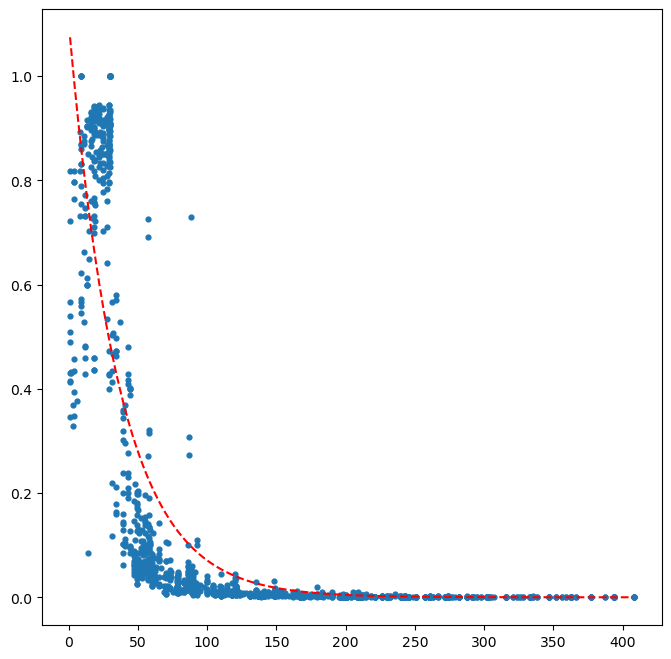

In [23]:
#@title
#Sunday FSI Curve
sun_fsi = all_coupons[all_coupons["Media_Type"] == "SUNDAY FSI"]
np_sun_fsi = sun_fsi[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_sun_fsi[:, 0]
y = np_sun_fsi[:, 1]

print('Sunday FSI R^2 & Fit Chart')
a, b = output(x, y, p0)

Paperless R^2 & Fit Chart
R^2 = 0.6993
Curve Formula: y=1.05793*exp^(-0.02303*x)


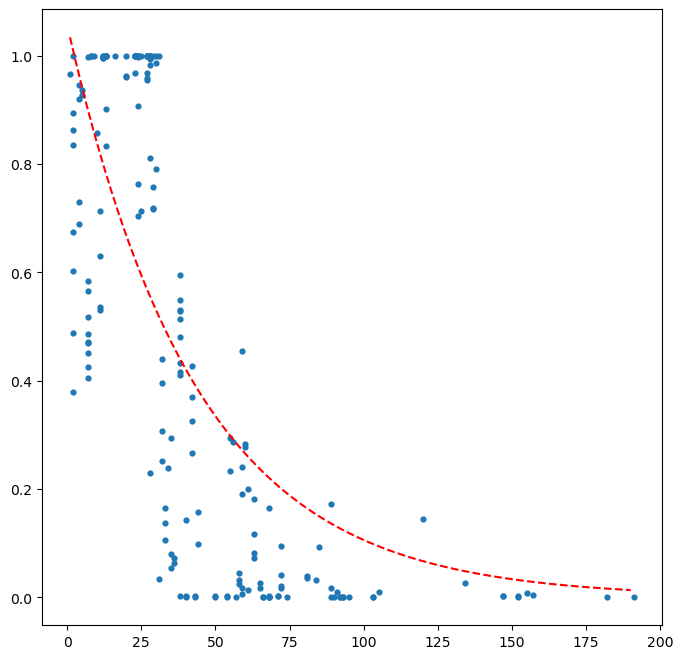

In [24]:
#@title
# Paperless Curve
paperless = all_coupons[all_coupons["Media_Type"] == "PAPERLESS"]
np_paperless = paperless[['Time_Since_Issue',
                          'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paperless[:, 0]
y = np_paperless[:, 1]

print('Paperless R^2 & Fit Chart')
a, b = output(x, y, p0)

Paperless + Print Group R^2 & Fit Chart
R^2 = 0.7342
Curve Formula: y=0.93864*exp^(-0.02384*x)


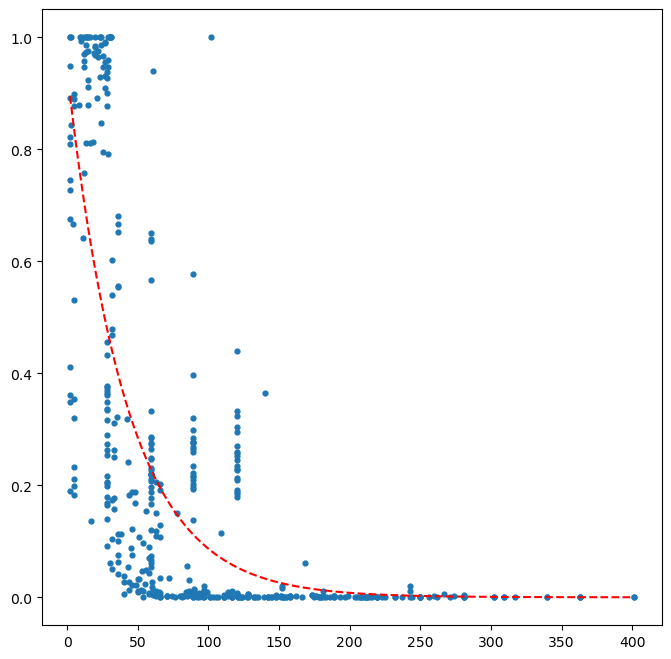

In [25]:
#@title
# Paperless + Print At Home, Print at Home, Paperless + Print at Home Curve

paper_print = all_coupons[all_coupons["Media_Type"].
                      isin(["PAPERLESS + PRINT AT HOME", "PRINT AT HOME",
                            "PAPERLESS + PRINT AT HOME + HANDOUT"])]

np_paper_print = paper_print[['Time_Since_Issue',
                              'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paper_print[:, 0]
y = np_paper_print[:, 1]

print('Paperless + Print Group R^2 & Fit Chart')
a, b = output(x, y, p0)

Handout Group R^2 & Fit Chart
R^2 = 0.8306
Curve Formula: y=0.51968*exp^(-0.01112*x)


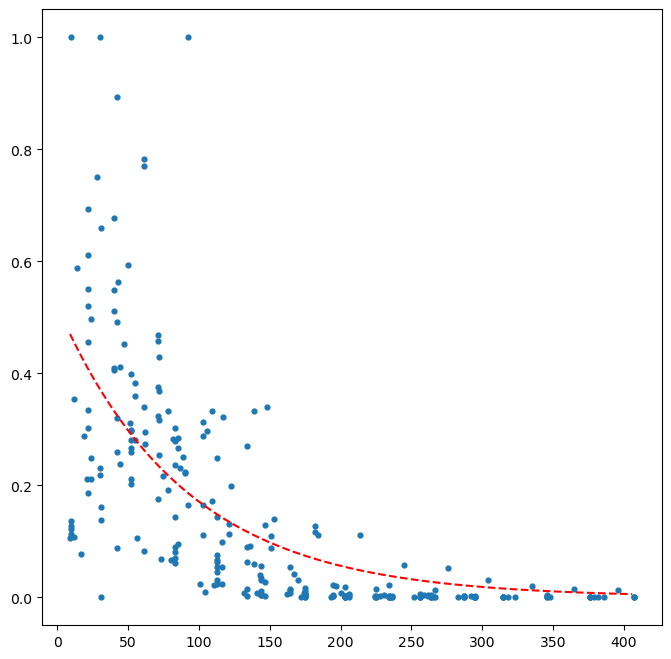

In [26]:
#@title
# Handout Checkout Curve
# HANDOUT, HANDOUT IN-STORE, HANDOUT IN-STORE DISPLAY, HANDOUT IN-STORE TEARPAD,
# HANDOUT SHELF DISPENSER, HANDOUT WITH SAMPLE, INSTANT ON-PACK,
# INSTANT ON-PACK FACTORY APPLIED, ON-PACK

handout = all_coupons[all_coupons["Media_Type"].
                      isin(["HANDOUT", "HANDOUT IN-STORE",
                            "HANDOUT IN-STORE DISPLAY",
                            "HANDOUT IN-STORE TEARPAD",
                            "HANDOUT SHELF DISPENSER",
                            "HANDOUT WITH SAMPLE", "INSTANT ON-PACK",
                            "INSTANT ON-PACK FACTORY APPLIED", "ON-PACK"])]

np_handout = handout[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_handout[:, 0]
y = np_handout[:, 1]

print('Handout Group R^2 & Fit Chart')
a, b = output(x, y, p0)

All Other Group R^2 & Fit Chart
R^2 = 0.7101
Curve Formula: y=0.25901*exp^(-0.0023*x)


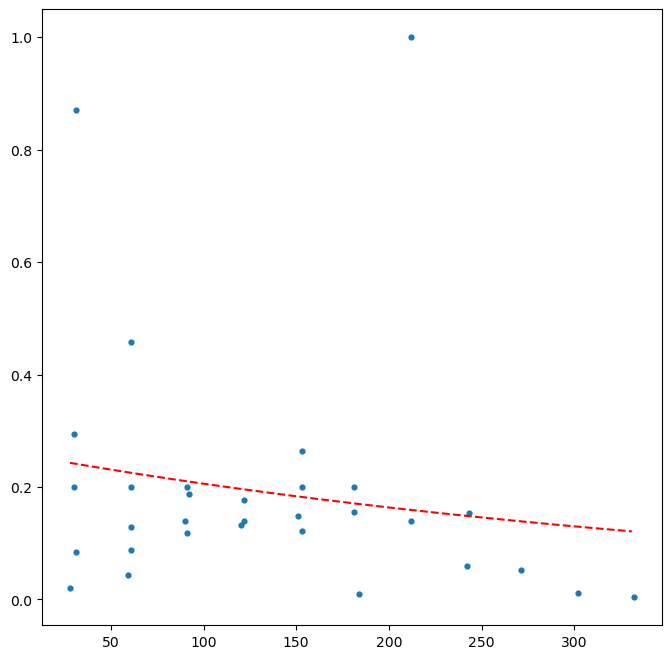

In [27]:
#@title
# All Other: MISCELLANEOUS MEDIA, DIRECT MAIL, DIRECT MAIL SOLO

misc = all_coupons[all_coupons["Media_Type"].isin(["MISCELLANEOUS MEDIA",
                                                    "DIRECT MAIL SOLO",
                                                    "DIRECT MAIL"])]

np_misc = misc[['Time_Since_Issue',
                'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_misc[:, 0]
y = np_misc[:, 1]

print('All Other Group R^2 & Fit Chart')
a, b = output(x, y, p0)
